# Clustering



In [ ]:
# librerias Necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
!pip install -q kaggle

EL dataset que se esta utilizando es de Accidentes de trafico de Estados Unidos del año 2016 al 2020, se puede consultar informacion del dataset en los siguientes enlances:

*   https://www.kaggle.com/sobhanmoosavi/us-accidents
*   https://smoosavi.org/datasets/us_accidents 



In [ ]:
#API de kaggle para descargar el dataset
import os
os.environ['KAGGLE_USERNAME'] ="sergiomr04" # username 
os.environ['KAGGLE_KEY'] = "7400f9c2913e5b4b8a17ab2661f963b6" # key 
!kaggle datasets download -d sobhanmoosavi/us-accidents # api copied from kaggle

 99% 288M/290M [00:04<00:00, 116MB/s]
100% 290M/290M [00:04<00:00, 63.0MB/s]


In [ ]:
#descomprimimos los datos descargados y eliminamos el arcivo ZIP 
#si pregunta si quieremos remplazar el archivo debemos escribir "yes"
!unzip -q us-accidents.zip -d .
os.remove("/content/us-accidents.zip")

In [ ]:
#Realizamos la Lectura de los datos
accidentes = pd.read_csv("/content/US_Accidents_Dec20_Updated.csv")

Una vez cargados los datos, podemos observar las columnas de las cuales esta compuesto. Para una informacion mas especifica acerca de las columnas, se pede consultar el diccionario de datos, ya sea en la carpeta de este repositorio, o en el siguiente enlace.
* https://www.kaggle.com/sobhanmoosavi/us-accidents 

In [ ]:
accidentes.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

De igual manera exploramos un poco los datos para saber el tipo de datos que hay en cada columna y si existen NaNs en los datos.

In [ ]:
accidentes.isna().sum(axis=0)

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

In [ ]:
accidentes.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

Como se puede observar el Dataset esta compuesto de varios tipos de datos, en general los tipo object se refieren a datos categoricos mayormente, a excepcion de Description, la cual contiene una descripcion en texto acerca del accidente.





Para empezar a analizar los datos, vamos a descrubir como se distribuyen los accodentes a lo largo de Estados Unidos

In [ ]:
#calculo de accidentes por estado
estados = accidentes.groupby('State')['State'].count()
estados=estados.rename("count").reset_index()


In [ ]:
#import requests
!pip install geopandas
import geopandas
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

     |████████████████████████████████| 1.0MB 8.8MB/s 
     |████████████████████████████████| 6.6MB 26.4MB/s 
     |████████████████████████████████| 15.4MB 201kB/s 


In [ ]:
nil=geopandas.read_file(state_geo)
nil.head()

,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


In [ ]:
nil.rename(columns={'id':'State'}, inplace=True)

In [ ]:
mun_mapping = nil.merge(estados, on='State')
mun_mapping["percent"]=round(mun_mapping['count']/mun_mapping['count'].sum()*100,2)
mun_mapping


,State,name,geometry,count,percent
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",33290,1.15
1,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",61707,2.13
2,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",4726,0.16
3,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",730744,25.19
4,CO,Colorado,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",37280,1.28
5,CT,Connecticut,"POLYGON ((-73.05353 42.03905, -71.79931 42.022...",24054,0.83
6,DE,Delaware,"POLYGON ((-75.41409 39.80446, -75.50720 39.683...",4625,0.16
7,FL,Florida,"POLYGON ((-85.49714 30.99754, -85.00421 31.003...",263300,9.07
8,GA,Georgia,"POLYGON ((-83.10919 35.00118, -83.32279 34.787...",69536,2.40
9,ID,Idaho,"POLYGON ((-116.04751 49.00024, -116.04751 47.9...",4165,0.14


In [ ]:
x_map=nil.centroid.x.mean()
y_map=nil.centroid.y.mean()
print(x_map,y_map)

-93.8092064016807 39.62510389893046


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [ ]:
import folium
mymap = folium.Map(location=[y_map, x_map], zoom_start=4,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)

mymap.choropleth(
 geo_data=mun_mapping,
 name='Choropleth',
 data=mun_mapping,
 columns=['State','count'],
 key_on="feature.properties.State",
 fill_color='YlGnBu',
 fill_opacity=1,
 line_opacity=1,
 legend_name='Numero de Accidentes',
 smooth_factor=0
)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    mun_mapping,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name','percent'],
        aliases=['Estado: ','Numero de accidentes totales en %: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
mymap.add_child(NIL)
mymap.keep_in_front(NIL)
folium.LayerControl().add_to(mymap)
mymap


/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning



Debido a la gran catidad de datos se decide establecer solo el estdo con mayor numero de accidentes, siendo California, con un total de 730744 accidentes reportados


In [ ]:
estados = accidentes.groupby('State')['State'].count()
estados.sort_values(ascending=False)

State
CA    730744
FL    263300
TX    226640
NY    126176
NC    122797
SC    120462
OR     98352
PA     89745
VA     89730
MN     79712
IL     77626
GA     69536
MI     67073
AZ     61707
TN     55495
MD     52755
NJ     50214
LA     50103
WA     49455
OH     47836
UT     46897
CO     37280
OK     35105
AL     33290
MO     28674
MA     25121
IN     24993
CT     24054
KY     15296
WI     14669
NE     13678
IA      9492
RI      8314
NV      7812
KS      7444
NH      6250
MS      5419
DC      5201
AR      4726
DE      4625
ID      4165
NM      3973
WV      3421
MT      3333
ME      2266
VT       555
ND       463
WY       419
SD       217
Name: State, dtype: int64

#**Cluster para Determinar Puntos de control y medicion.**

Como se comento en el Analis exploratorio de los datos, este proyecto se delimito al estado que reporta mas incidentes de transito, el cual es California. Por lo cual en esta seccion se pretende analizar el numero de puntos de control que serian convenientes para:
* Controlar la logistica de incidentes de transito y poder disminuirlos
* Extablecer la ubicacion donde seria beneficioso obtener mas datos para mejorar e incrementar el dataset. Es decir, tener puntos de medicion por regiones.

In [ ]:
#Subset de los datos de California
acc_CA = accidentes[accidentes['State']=='CA'].reset_index(drop=True)
acc_CA.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-8,2,2019-12-21 23:59:00,2019-12-22 00:32:06,34.034017,-118.026972,34.034017,-118.026972,0.000,At CA-60/Pomona Fwy - Accident.,NaN,CA-60 W,R,Whittier,Los Angeles,CA,90601,US,US/Pacific,KEMT,2019-12-21 23:53:00,55.0,55.0,40.0,29.86,10.0,E,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-10,2,2019-01-30 08:44:18,2019-01-30 09:14:17,34.426330,-118.585100,34.420220,-118.581900,0.460,At Magic Mountain Pky - Accident. Hard shoulde...,NaN,Golden State Fwy S,R,Valencia,Los Angeles,CA,91355,US,US/Pacific,K3A6,2019-01-30 08:39:00,57.0,57.0,77.0,29.08,5.0,VAR,5.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,A-17,2,2016-07-09 14:54:01,2016-07-09 15:54:01,34.103172,-118.249969,34.103172,-118.249969,0.000,Accident on CA-2 Southbound at Exit 13 I-5.,NaN,CA-2 S,R,Los Angeles,Los Angeles,CA,90039,US,US/Pacific,KCQT,2016-07-09 14:47:00,78.1,NaN,60.0,29.99,10.0,Variable,3.5,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-18,2,2020-11-21 16:32:00,2020-11-21 20:18:30,34.186595,-117.439427,34.185871,-117.439039,0.055,Incident on SIERRA AVE near LYTLE CREEK RD Exp...,3738.0,Sierra Ave,R,Fontana,San Bernardino,CA,92336-1108,US,US/Pacific,KONT,2020-11-21 16:53:00,75.0,75.0,26.0,28.98,9.0,WSW,6.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


Como un primer analisi de datos podemos ver los Condados que reportan mas incidentes de Transito. En este caso el condado de Alameda es el que reporta mas incidentes

In [ ]:
# Numero de Incidentes de Transito por Condado en California
county=acc_CA.groupby("County")["County"].size()
#acc_CA.groupby("County")["County"].sum()
county=county.rename("count").reset_index()
county.head(5)

,County,count
0,Alameda,45201
1,Alpine,151
2,Amador,1019
3,Butte,2070
4,Calaveras,1176


Podemos visulizar esto de manera grafica por medio de un Mapa coroplético

In [ ]:
#Libreria para Geocoding
#!pip install geopandas
import geopandas


In [ ]:
#Herramienta para la generacion de Mapas coropléticos
import json
import folium
import pandas as pd

# URL del los poligonos del mapa
url = (
    "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/california-counties.geojson"
)
#US_Unemployment_Oct2012 = f"{url}/US_Unemployment_Oct2012.csv"

#geo_json_data = json.loads(requests.get(us_states).text)
#unemployment = pd.read_csv(US_Unemployment_Oct2012)

nil=geopandas.read_file(url)
nil.head()

,name,cartodb_id,created_at,updated_at,geometry
0,Alameda,1,2015-07-04T21:04:58+00:00,2015-07-04T21:04:58+00:00,"MULTIPOLYGON (((-122.31293 37.89733, -122.2884..."
1,Alpine,2,2015-07-04T21:04:58+00:00,2015-07-04T21:04:58+00:00,"POLYGON ((-120.07239 38.70277, -119.96495 38.7..."
2,Amador,3,2015-07-04T21:04:58+00:00,2015-07-04T21:04:58+00:00,"POLYGON ((-121.02726 38.48925, -121.02741 38.5..."
3,Butte,4,2015-07-04T21:04:58+00:00,2015-07-04T21:04:58+00:00,"POLYGON ((-121.87925 39.30361, -121.90831 39.3..."
4,Calaveras,5,2015-07-04T21:04:58+00:00,2015-07-04T21:04:58+00:00,"POLYGON ((-120.87605 38.02889, -120.91875 38.0..."


In [ ]:
# Eliminamos las columnas que no nos sirven del dataframe
nil.rename(columns={'name':'County'}, inplace=True)
nil.drop(["created_at","updated_at","cartodb_id"],inplace=True,axis=1)

In [ ]:
# Unimos los datos de poligonos a los datos de Incidentes por Condado
mun_mapping = nil.merge(county, on='County')
mun_mapping["percent"]=round(mun_mapping['count']/mun_mapping['count'].sum()*100,2)
mun_mapping.head()


,County,geometry,count,percent
0,Alameda,"MULTIPOLYGON (((-122.31293 37.89733, -122.2884...",45201,6.19
1,Alpine,"POLYGON ((-120.07239 38.70277, -119.96495 38.7...",151,0.02
2,Amador,"POLYGON ((-121.02726 38.48925, -121.02741 38.5...",1019,0.14
3,Butte,"POLYGON ((-121.87925 39.30361, -121.90831 39.3...",2070,0.28
4,Calaveras,"POLYGON ((-120.87605 38.02889, -120.91875 38.0...",1176,0.16


In [ ]:
# Buscamos el punto medio para ubicarnos en el mapa
x_map=nil.centroid.x.mean()
y_map=nil.centroid.y.mean()
print(x_map,y_map)
location=[x_map,y_map]

-120.72745489130789 37.84553438318741


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Creacion del Mapa 
mymap = folium.Map(location=[y_map, x_map], zoom_start=6.5,tiles=None)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)

mymap.choropleth(
 geo_data=mun_mapping,
 name='Choropleth',
 data=mun_mapping,
 columns=['County','count'],
 key_on="feature.properties.County",
 fill_color='YlGnBu',
 fill_opacity=1,
 line_opacity=1,
 legend_name='Numero de Accidentes',
 smooth_factor=0
)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    mun_mapping,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['County','percent'],
        aliases=['Condado: ','Numero de accidentes totales en %: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
mymap.add_child(NIL)
mymap.keep_in_front(NIL)
folium.LayerControl().add_to(mymap)



#marks.apply(lambda row:folium.Marker(location=[row["lat"], row["lon"]],
#                                     popup="cluster "+str(row['cluster']),draggable=False,icon=folium.Icon(color="black")).add_to(mymap), axis=1)

mymap


/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


Despues de realizarse una investiacion acerca de como California esta lidiando con los incidentes de transito y la toma de informacion acerca de estos. Se encontro que tienen planeado dividir el Estado en 9 regiones para poder tomar informacion y ayudar a la prevrencion de acciodentes. Sin emargo, a nostros nos parecio mucho tener 9 centroides o regiones, por lo cual se opto por realizar el metodo de Elbow para determinar el numero de centroides mas adecuado de acuerdo a nuestros datos.

Para determinar esto, se utilizaran los datos de Latitud y Longitud de cada incidente, se graficara la varianza contra el numero de cluster elegidos, y se elegira el numero de clusters(K) que vuelve la curva plana

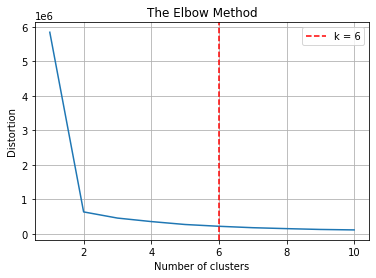

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Algoritmo del metodo de Elbow
from sklearn import preprocessing, cluster
import scipy
X = acc_CA[["Start_Lat","Start_Lng"]]
# maximo numero de clusters
max_k = 10
## iteraciones
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: la que tenga la derivada mas baja 
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

A partir de lo obtenido se puede ver que el rango del numero de centroides o clusters adecado para nuestro Dataser se encuentra entre 2 a 6, ya que la curva tiene un comportamiento muy recto. Mediante el calculo de la derivada se obtuvo que el punto de cambio es 6 clusters por lo cual se eligio 6 centroides 

In [ ]:
# Elegimos los datos necesarios para X y Y
condados = list(acc_CA["County"].unique())
num_condado = list(range(58))
val_replace = dict(zip(condados, num_condado))
X = acc_CA[['Start_Lat','Start_Lng']].to_numpy()
Y = acc_CA['County'].map(val_replace).to_numpy()


In [ ]:
# Obtenemos las coordenadas de los centroides
K = 6 #58
#Dividimos entre train y test.
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
#Entrenamos con x_train...
modelo_kmeans = KMeans(n_clusters = K).fit(x_train)
#Y extraemos los centroides.
centroides = modelo_kmeans.cluster_centers_

In [ ]:
# Modulos necesarios para clasificar los datos en funcion de los centroides
from math import acos, cos, sin, radians

## Distancia eucilidiana:
def distSemiverseno(muestra, dataset):
    distancias = np.zeros((dataset.shape[0],1))
    for counter in range(0,dataset.shape[0]):
        punto1 = list(map(radians,muestra))
        punto2 = list(map(radians,dataset[counter]))
        distancias[counter] = acos(sin(punto1[0])*sin(punto2[0]) + cos(punto1[0])*cos(punto2[0])*cos(punto1[1]-punto2[1]))
    return distancias

def centroideCercano(muestra, listaCentroides):
    listaDistancias = distSemiverseno(muestra, listaCentroides)
    centroideCercano = np.argmin(listaDistancias)
    return centroideCercano

def clasificarPorCentroides(muestras, centroides):
    resultado = np.zeros((muestras.shape[0],1))
    for counter in range(0, muestras.shape[0]):
        resultado[counter] = centroideCercano(muestras[counter], centroides)
    return resultado

In [ ]:
# Clasificacion de los datos
clasificacion = clasificarPorCentroides(x_test,centroides)

Una vez Asigados los puntos podemos ver la clasificacion de los clusters credos al igual que la distribuciones de los incidentes.

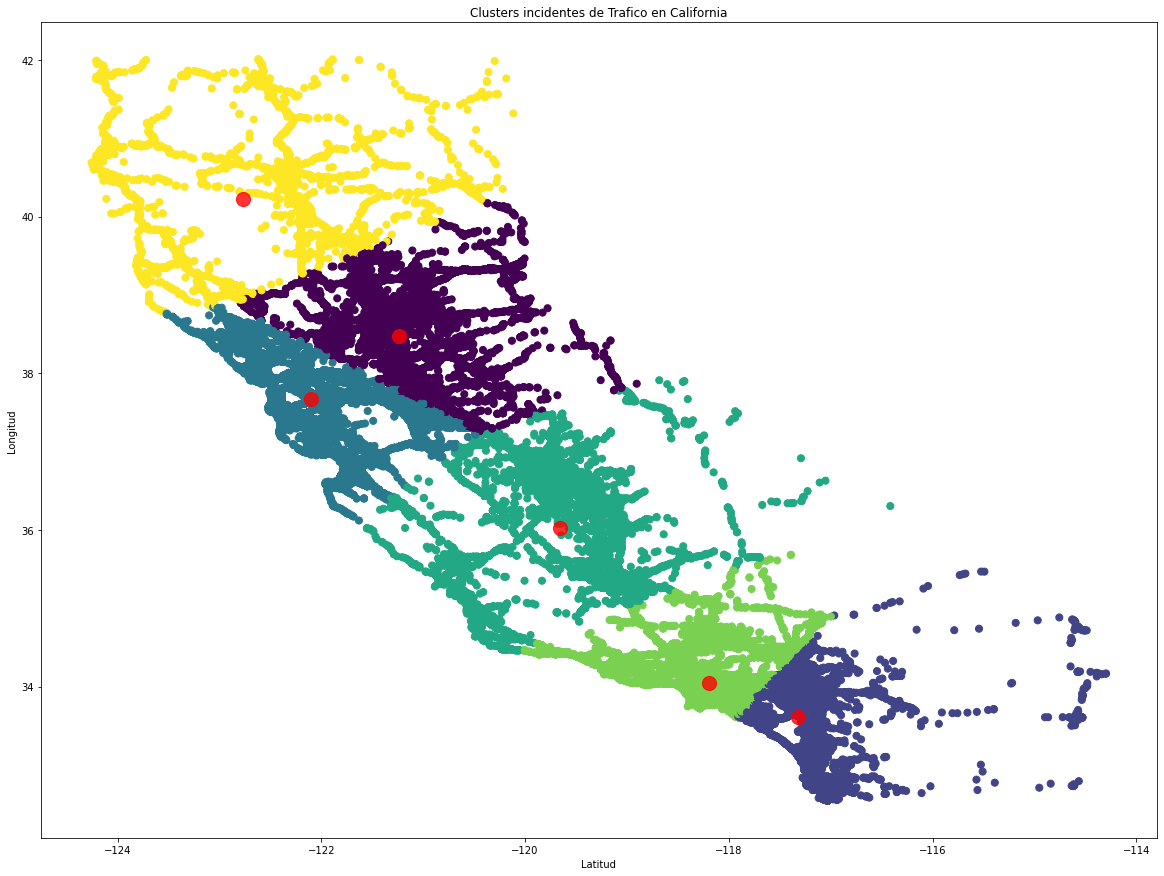

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(x_test[:,1],x_test[:,0],c=clasificacion[:,0],s=50, cmap='viridis')
plt.scatter(centroides[:, 1], centroides[:, 0], c='red', s=200, alpha=0.8)
plt.title('Clusters incidentes de Trafico en California')
plt.xlabel("Latitud")
plt.ylabel('Longitud')
plt.show();

Se puede apreciar como se calsificaron los puntos en diferentes clusters, de igual forma se puede observar los centroides, en donde se propondria la ubicacion de los sitios de control y recopilacion de informacion para la prevencion de incidentes de transito. Por lo tanto el estado de California quedaria divido en 6 regiones. 
Podemos ver un mapa mas interactivo para poder ver en que condado estaria cada punto, mediante el siguiente codigo 

In [ ]:
# Creacion del dataframe de los centroides 
marks = pd.DataFrame({'lat': centroides[:, 0], 'lon': centroides[:, 1],"cluster":range(centroides.shape[0])})


In [ ]:
#Mediante reverse geocoding se obtiene la direccion del centroiden en base a la latitud y longitud
#!pip install geopy
from geopy.geocoders import Nominatim
geolocalizador = Nominatim(user_agent="MyCoder", timeout=10)
marks["calle"]=marks.apply(lambda row:geolocalizador.reverse([row["lat"], row["lon"]]), axis=1)
marks["direccion"]=marks["calle"].map(lambda x:x[0])


In [ ]:
marks.head()

,lat,lon,cluster,calle,direccion
0,38.469990,-121.241702,0,"(Sloughhouse Road, Sacramento County, Californ...","Sloughhouse Road, Sacramento County, Californi..."
1,33.612154,-117.322147,1,"(19339, Jasmine Court, Riverside County, Calif...","19339, Jasmine Court, Riverside County, Califo..."
2,37.664930,-122.097061,2,"(101;103;105;107;109;111;113;115;117;119, Burb...","101;103;105;107;109;111;113;115;117;119, Burba..."
3,36.022454,-119.655419,3,"(Redding Avenue, Kings County, California, Uni...","Redding Avenue, Kings County, California, Unit..."
4,34.045323,-118.198796,4,"(3014, Boulder Street, Boyle Heights, Los Ange...","3014, Boulder Street, Boyle Heights, Los Angel..."


In [ ]:

marks.apply(lambda row:folium.Marker(location=[row["lat"], row["lon"]],
                                     popup=str(row['direccion']),draggable=False,icon=folium.Icon(color="black")).add_to(mymap), axis=1)

mymap

Mediante el mapa anterior es ma facil ubicar los puntos y las direcciones en donde se podrian colocar los modulos de control y toma de informacion.